# Datashader examples: 3d mesh

Bringing big data to live easily...

Example from: http://datashader.org/topics/bay_trimesh.html


In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import datashader as ds
import datashader.transfer_functions as tf
import datashader.utils as du
import pandas as pd

In [3]:
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen

resp = urlopen('http://s3.amazonaws.com/datashader-data/Chesapeake_and_Delaware_Bays.zip')
zipfile = ZipFile(BytesIO(resp.read()))
df = pd.read_table(zipfile.open('Chesapeake_and_Delaware_Bays.3dm'), 
                   delim_whitespace=True,
                   header=None,
                   skiprows=1,
                   names=('row_type', 'cmp1', 'cmp2', 'cmp3', 'val'), index_col=1)

In [4]:
tf.Images(df.head(), df.tail())

In [5]:
e3t = df[df['row_type'] == 'E3T'][['cmp1', 'cmp2', 'cmp3']].values.astype(int) - 1
nd  = df[df['row_type'] == 'ND' ][['cmp1', 'cmp2', 'cmp3']].values.astype(float)
nd[:, 2] *= -1 # Make depth increasing

verts = pd.DataFrame(nd,  columns=['x', 'y', 'z'])
tris  = pd.DataFrame(e3t, columns=['v0', 'v1', 'v2'])

print('vertices:', len(verts), 'triangles:', len(tris))

vertices: 560838 triangles: 1065955


In [6]:
%time mesh = du.mesh(verts,tris)

CPU times: user 39.2 ms, sys: 27.9 ms, total: 67 ms
Wall time: 66.1 ms


CPU times: user 1.24 s, sys: 21.8 ms, total: 1.26 s
Wall time: 1.26 s


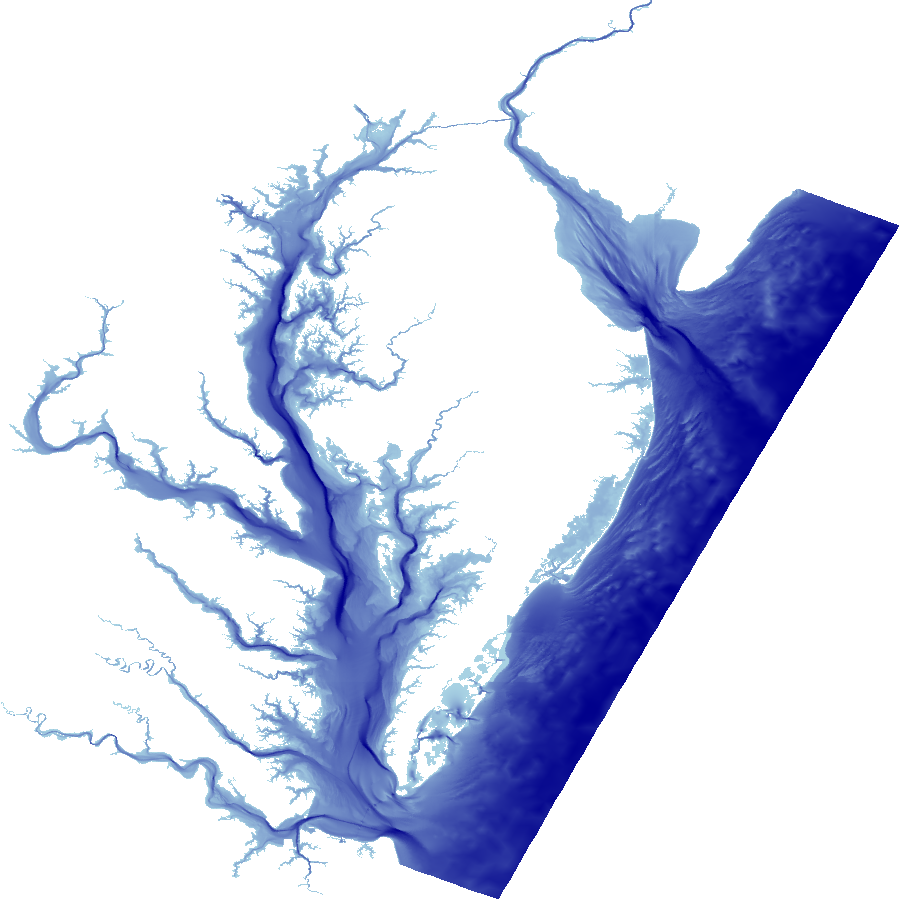

In [7]:
cvs = ds.Canvas(plot_height=900, plot_width=900)
%time agg = cvs.trimesh(verts, tris, mesh=mesh)
tf.shade(agg)


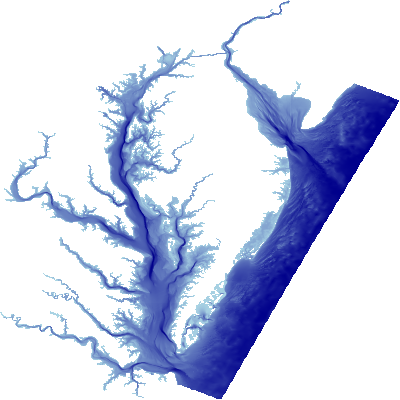
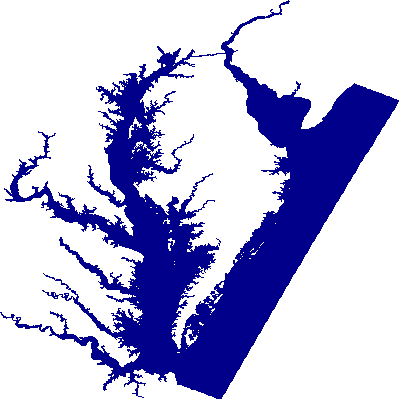
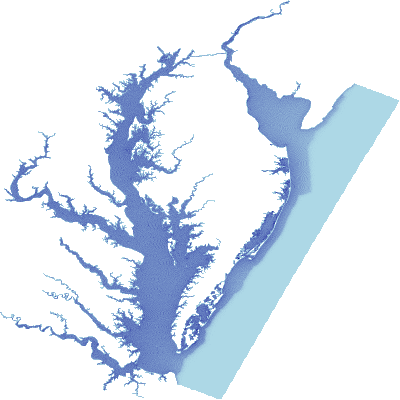
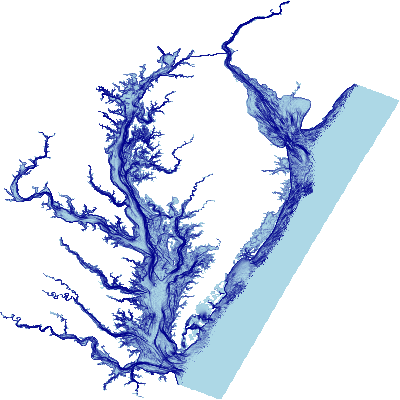

In [8]:
cvs = ds.Canvas(plot_height=400, plot_width=400)

tf.Images(tf.shade(cvs.trimesh(verts, tris, mesh=mesh, agg=ds.mean('z')), name="mean"),
          tf.shade(cvs.trimesh(verts, tris, mesh=mesh, agg=ds.any()),     name="any"),
          tf.shade(cvs.trimesh(verts, tris, mesh=mesh, agg=ds.count()),   name="count", how='linear'),
          tf.shade(cvs.trimesh(verts, tris, mesh=mesh, agg=ds.std('z')),  name="std")).cols(2)


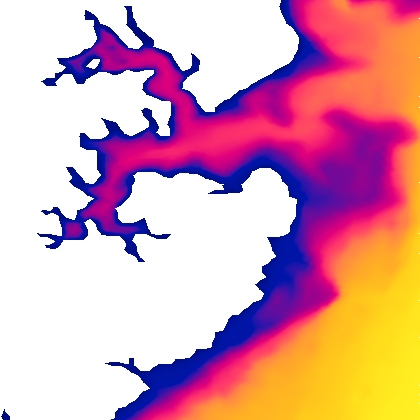
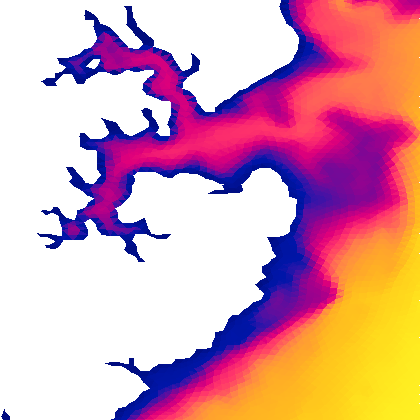

In [9]:
cvs = ds.Canvas(plot_height=420, plot_width=420, x_range=(-76.56, -76.46), y_range=(38.78, 38.902))
from colorcet import bmy as c

tf.Images(tf.shade(cvs.trimesh(verts, tris, mesh=mesh, interp=True),  cmap=c, name="Interpolated"),
          tf.shade(cvs.trimesh(verts, tris, mesh=mesh, interp=False), cmap=c, name="Raw triangles"))

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
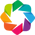

:Layout
   .DynamicMap.I  :DynamicMap   []
      :RGB   [x,y]   (R,G,B,A)
   .DynamicMap.II :DynamicMap   []
      :RGB   [x,y]   (R,G,B,A)

In [10]:
import holoviews as hv
import geoviews as gv
from holoviews import opts
from holoviews.operation.datashader import datashade

hv.extension("bokeh")
opts.defaults(
    opts.Image(width=450, height=450),
    opts.RGB(width=450, height=450))

wireframe = datashade(hv.TriMesh((tris,verts), label="Wireframe"))
trimesh = datashade(hv.TriMesh((tris,hv.Points(verts, vdims='z')), label="TriMesh"), aggregator=ds.mean('z'))
wireframe + trimesh

In [11]:
opts.defaults(opts.WMTS(width=500, height=500))
tiles = gv.WMTS('https://maps.wikimedia.org/osm-intl/{Z}/{X}/{Y}@2x.png')

%time points = gv.operation.project_points(gv.Points(verts, vdims=['z']))

tiles * datashade(hv.TriMesh((tris, points)), aggregator=ds.mean('z'), precompute=True)

CPU times: user 98.5 ms, sys: 0 ns, total: 98.5 ms
Wall time: 98.5 ms


:DynamicMap   []
   :Overlay
      .WMTS.I :WMTS   [Longitude,Latitude]
      .RGB.I  :RGB   [x,y]   (R,G,B,A)